In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width',1000)

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Checking the distribution of Price

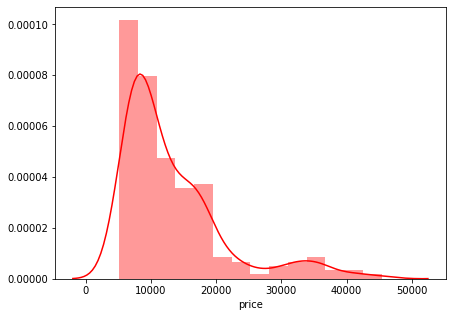

In [3]:
plt.figure(figsize=(7,5))
sns.distplot(df['price'], color='r')
plt.show()

### Object Variables

In [4]:
catcols = list(df.select_dtypes(include='object'))
print(catcols)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### Extracting the names of the car companies

In [5]:
df['CarName'].value_counts()

toyota corolla                     6
toyota corona                      6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mitsubishi outlander               3
honda civic                        3
toyota mark ii                     3
mitsubishi g4                      3
mazda 626                          3
saab 99e                           2
toyota corolla liftback            2
bmw 320i                           2
honda civic cvcc                   2
audi 100ls                         2
nissan clipper                     2
toyota corolla 1200                2
subaru                             2
nissan latio                       2
volvo 264gl                        2
toyota starlet                     2
saab 99le                          2
saab 99gle                         2
plymouth fury iii                  2
porsche cayenne                    2
mazda glc deluxe                   2
volvo 244dl                        2
m

In [6]:
df['company'] = df['CarName'].str.split(' ').str[0]

co = list(df['company'].value_counts().head(12).index)
df['company'] = np.where(df['company'].isin(co), df['company'], 'other')

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,other
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,other
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,other
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,other
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,other


In [8]:
df['company'].value_counts()

other         48
toyota        31
nissan        17
mazda         15
mitsubishi    13
honda         13
subaru        12
volvo         11
peugeot       11
volkswagen     9
dodge          9
buick          8
bmw            8
Name: company, dtype: int64

### Checking other features

In [9]:
for i in catcols:
    print()
    print(i)
    print(df[i].value_counts())


CarName
toyota corolla                     6
toyota corona                      6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mitsubishi outlander               3
honda civic                        3
toyota mark ii                     3
mitsubishi g4                      3
mazda 626                          3
saab 99e                           2
toyota corolla liftback            2
bmw 320i                           2
honda civic cvcc                   2
audi 100ls                         2
nissan clipper                     2
toyota corolla 1200                2
subaru                             2
nissan latio                       2
volvo 264gl                        2
toyota starlet                     2
saab 99le                          2
saab 99gle                         2
plymouth fury iii                  2
porsche cayenne                    2
mazda glc deluxe                   2
volvo 244dl                  

### Dropping unnecessary features

In [10]:
df = df.drop(['CarName','enginelocation','car_ID'], 1)

In [11]:
catcols = list(df.select_dtypes(include='object'))

### Creating Dummies

In [12]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### It is required to convert the feature 'symboling' into categorical as can be seen from the value counts. After that, we can proceed with creating dummies.

In [13]:
df['symboling'] = df['symboling'].astype(object)

In [14]:
catcols = list(df.select_dtypes(include='object'))
print(catcols)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'company']


In [15]:
df = pd.get_dummies(df, columns=catcols, drop_first=True)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_buick,company_dodge,company_honda,company_mazda,company_mitsubishi,company_nissan,company_other,company_peugeot,company_subaru,company_toyota,company_volkswagen,company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null uint8
fueltype_gas             205 non-null uint8

### Split into Train and Test

In [17]:
X = df.drop('price',1)
y = df['price']

In [18]:
X = X.drop(['cylindernumber_two','cylindernumber_three', 'fuelsystem_idi'],1)

xc = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(xc, y, test_size = 0.3, random_state = 100)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 56) (62, 56) (143,) (62,)


### Checking Variance Inflation Factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
pd.DataFrame({'vif':vif}, index = X.columns)

,vif
wheelbase,4560.150068
carlength,3716.445251
carwidth,10018.904924
carheight,2171.332126
curbweight,957.617339
enginesize,582.998897
boreratio,1628.817913
stroke,484.314029
compressionratio,1427.491393
horsepower,314.903138


### Applying OLS algortihm (Stats Model)

In [32]:
lin_reg = sm.OLS(y_train, X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              207.6
Date:                Sun, 29 Dec 2019   Prob (F-statistic):                    7.15e-76
Time:                        21:00:25   Log-Likelihood:                         -1238.6
No. Observations:                 143   AIC:                                      2583.
Df Residuals:                      90   BIC:                                      2740.
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase               140.2708    118.080      1.188      0.238     -94.316     374.858
carlength              -154.8731     55.275     -2.802      0.006    -264.686     -45.061
carwidth                416.1635    231.943      1.794      0.076     -44.632     876.959
carheight              -224.1597    127.577     -1.757      0.082    -477.614      29.294
curbweight                7.4187      1.841      4.031      0.000       3.762      11.075
enginesize               86.6148     27.979      3.096      0.003      31.030     142.200
boreratio             -4290.3976   1673.376     -2.564      0.012   -7614.851    -965.944
stroke                -1920.5792    970.091     -1.980      0.051   -3847.835       6.677
compressionratio        409.9562    570.986      0.718      0.475    -724.408    1544.320
horsepower               43.9891     23.258      1.891      0.062      -2.217      90.196
peakrpm                   0.5660      0.741      0.764      0.447      -0.906       2.038
citympg                -121.7158    161.218     -0.755      0.452    -442.004     198.573
highwaympg               32.4962    144.617      0.225      0.823    -254.810     319.803
symboling_-1            761.5410   1551.130      0.491      0.625   -2320.049    3843.131
symboling_0            1524.5183   1781.716      0.856      0.394   -2015.171    5064.207
symboling_1            1659.5118   1832.611      0.906      0.368   -1981.290    5300.314
symboling_2             903.4163   1882.448      0.480      0.632   -2836.395    4643.228
symboling_3            1000.1987   2001.628      0.500      0.619   -2976.384    4976.781
fueltype_gas           3584.8394   7806.313      0.459      0.647   -1.19e+04    1.91e+04
aspiration_turbo        622.9844    943.513      0.660      0.511   -1251.469    2497.438
doornumber_two         -585.4286    677.274     -0.864      0.390   -1930.952     760.095
carbody_hardtop         303.5677   1958.826      0.155      0.877   -3587.981    4195.117
carbody_hatchback     -1749.2400   1162.962     -1.504      0.136   -4059.666     561.186
carbody_sedan         -1308.4710   1303.161     -1.004      0.318   -3897.427    1280.485
carbody_wagon         -2607.1785   1443.848     -1.806      0.074   -5475.634     261.277
drivewheel_fwd          395.2397   1291.978      0.306      0.760   -2171.500    2961.980
drivewheel_rwd         -861.5582   1514.114     -0.569      0.571   -3869.610    2146.494
enginetype_dohcv      -7094.7870   4995.730     -1.420      0.159    -1.7e+04    2830.103
enginetype_l          -5078.4534   1215.819     -4.177      0.000   -7493.890   -2663.017
enginetype_ohc         -477.6202   1099.809     -0.434      0.665   -2662.583    1707.343
enginetype_ohc

In [33]:
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8889874488081386

### Linear Regression (ML)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
lr = LinearRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("The r2 score is",r2_score(y_test, y_pred))

The r2 score is 0.8775426826622915


#### The r-squared with ML model (0.877) is less than that obtained with OLS (0.888).

### Feature Selection

In [34]:
X_train.shape

(143, 55)

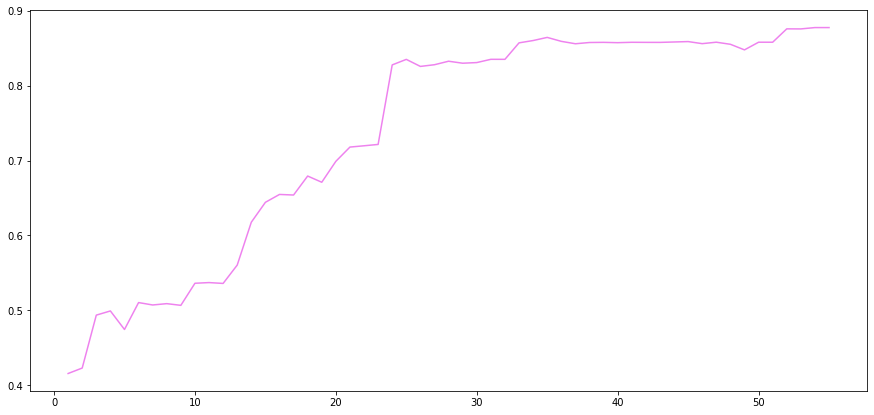

In [40]:
from sklearn.feature_selection import RFE

nof_cols = np.arange(1,56)

model = LinearRegression()
score_list=[]

for n in range(55):
    rfe = RFE(model, n+1)
    rfe.fit(X_train,y_train)
    y_pred=rfe.predict(X_test)
    score = r2_score(y_test,y_pred)
    score_list.append(score)

plt.figure(figsize=(15,7))
plt.plot(nof_cols,score_list, color='violet')
plt.show()

#### With 35 features, we may obtain a good r2 score as depicted in the figure. Let us display a list of variables that are to be selected.

In [41]:
rfe = RFE(model,35)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=35, step=1, verbose=0)

In [42]:
cols = pd.DataFrame(list(zip(X.columns, rfe.support_,rfe.ranking_)), columns = ['cols','select','rank'])
cols

,cols,select,rank
0,wheelbase,False,13
1,carlength,False,15
2,carwidth,True,1
3,carheight,False,17
4,curbweight,False,18
5,enginesize,False,12
6,boreratio,True,1
7,stroke,True,1
8,compressionratio,True,1
9,horsepower,False,16


In [44]:
y_pred = rfe.predict(X_test)
r2_score(y_test, y_pred)

0.8644164504459189

#### After recursive feature elimination, the r-sqaured value with 35 features (down from 55 features) is 0.864.

### RFE with log tranformation of dependent variable (y):

In [45]:
y = np.array(y)
y = np.log(y)

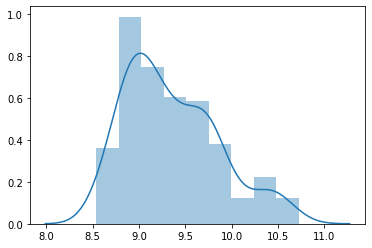

In [49]:
sns.distplot(y)
plt.show()

#### As can be seen from the distribution plot, the skewness in y has decreased after log tranformation.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
rfe = RFE(model,35)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=35, step=1, verbose=0)

In [48]:
y_pred = rfe.predict(X_test)
r2_score(y_test, y_pred)

0.8718580691907444

#### The r-squared score with RFE has now improved from 0.864 to 0.871